In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

## Exercise 10.1 (search)

We want to find a find the largest and smallest values in a long list of numbers. Implement
two algorithms, based on:

1. Iterating over the list entries; and 
1. First applying a built-in sort operation to the list.

Encapsulate each algorithm in a function, e.g.
```python
def min_max(x);
    # Implement your algorithm here
    return x_min, xmax
```    

To create lists of numbers for testing use, for example:
```python
x = np.random.rand(1000)
```

In [3]:
def min_max(x):
    "Return min and max of a list iterating over all elements"
    # Initialize min and max to the first element
    x_min, x_max = x[0], x[0]
    
    # For each element update min or max if it is less or greater than the current min or max
    for el in x:
        if el < x_min:
            x_min = el
        if el > x_max:
            x_max = el
    
    return x_min, x_max

# Test cases
print(min_max([1]))
print(min_max([1, 5, 0, 234, -548]))

(1, 1)
(-548, 234)


In [2]:
def min_max_ordered(x):
    "Return min and max of a list sorting the list first"
    # Sort the list
    sorted_x = sorted(x)
    # Return first and last element
    return sorted_x[0], sorted_x[-1]

# Test cases
print(min_max_ordered([1]))
print(min_max_ordered([1, 5, 0, 234, -548]))

(1, 1)
(-548, 234)


Timing the functions, it seems that the function that iterates over all the elements is faster for a list with a 1000 elements:

In [11]:
# Test and timing the two functions on a random number list
x = np.random.rand(1000)
%time a = min_max(x)
%time b = min_max_ordered(x)
print(a)
print(b)

Wall time: 0 ns
Wall time: 500 µs
(0.0019819344320162191, 0.99977553344181969)
(0.0019819344320162191, 0.99977553344181969)


Also on a list with a million element it seems faster, I guess it's because sorting is less efficient than just iterating over all elements (which is linear...):

In [12]:
# Test and timing the two functions on a random number list
x = np.random.rand(1000000)
%time a = min_max(x)
%time b = min_max_ordered(x)
print(a)
print(b)

Wall time: 213 ms
Wall time: 921 ms
(1.2138160998542702e-07, 0.99999985275397851)
(1.2138160998542702e-07, 0.99999985275397851)


## Exercise 10.2 (Newton's method for root finding)

Newton's method can be used to find a root $x$ of a function $f(x)$ such that

$$
f(x) = 0
$$

A Taylor series expansion of $f$ about $x_{i}$ reads:

$$
f(x_{i+1}) = f(x_{i}) + \left. f^{\prime} \right|_{x_{i}} (x_{i+1} - x_{i}) +  O((x_{i+1} - x_{i})^{2})
$$


If we neglect the higher-order terms and set $f(x_{i+1})$ to zero, we have Newton's method:

\begin{align}
x_{i + 1} &= - \frac{f(x_{i})}{f^{\prime}(x_{i})} + x_{i}
\\
x_{i} &\leftarrow x_{i+1}
\end{align}

In Newton's method, the above is applied iteratively until $\left|f(x_{i + 1})\right|$ is below a tolerance value.

Develop an implementation of Newton's method, with the following three functions in your implementation:
```python
def newton(f, df, x0, tol, max_it):
    # Implement here
    
    return x1  # return root
```
where `x0` is the initial guess, `tol` is the stopping tolerance, `max_it` is the maximum number 
of iterations, and 
```python
def f(x):
    # Evaluate function at x and return value


def df(x):
    # Evaluate df/dx at x and return value

```

Your implementation should raise an exception if the maximum number of iterations (`max_it`)
is exceeded.

Use your program to find the roots of:
    
$$
f(x) = \tan(x) - 2x
$$

between $-\pi/2$ and $\pi/2$. Plot $f(x)$ and $f^{\prime}(x)$ and on the same graph, 
and show the roots computed by Newton's method.

Newton's method can be sensitive to the starting value. Make sure you find the root around $x = 1.2$. What happens if you start at $x = 0.9$? It may help to add a print statement in the iteration loop, showing $x$ and $f$ at each iteration.


### Extension (optional)

For a complicated function we might not know how to compute the derivative, or it may be very complicated
to evaluate. Write a function that computes the *numerical derivative* of $f(x)$ by evaluating 
$(f(x + dx) - f(x - dx)) / (2dx)$, where $dx$ is small. How should you choose $dx$?

Function for which we want to find a root:

In [3]:
def f(x):
    # Evaluate function at x and return value
    return np.tan(x) - 2*x

and its derivative:

In [4]:
def df(x):
    # Evaluate df/dx at x and return value
    return (1 / np.cos(x)**2) - 2

Here's Newton's method implementation:

In [19]:
def newton(f, df, x0, tol, max_it):
    """Calculate a root of f using Newton's method starting at x0.
        The function stops if the tolerance tol is reached or raises an error if max_it is exceeded"""
    # Initialize iterations counter to 1 and x1 to x0
    i, x1 = 1, x0
    
    while i <= max_it:
        # Uncomment this to check the values calculated by the method
        #print(x1, f(x1))
        # Update x1
        x1 = -f(x1)/df(x1) + x1
        # Check if we are under the tolerance and return
        if np.abs(f(x1)) < tol:
            return x1
        # Update the counter
        i += 1
    
    # Raise an error if max_it is exceeded
    raise RuntimeError('Maximum number of iterations exceeded')

# Test cases
x1, x2, x3 = -1.2, 0, 1.2
sol1 = newton(f, df, x1, 1e-6, 100)
sol2 = newton(f, df, x2, 1e-6, 100)
sol3 = newton(f, df, x3, 1e-6, 100)

print('The solutions of f are {:.5f}, {:.5f} and {:.5f}'.format(sol1, sol2, sol3))

The solutions of f are -1.16556, 0.00000 and 1.16556


Using 0.9 as the starting value the method diverges:

In [20]:
print('Solution of f using 0.9 as the starting value:', newton(f, df, 0.9, 1e-6, 100))

RuntimeError: Maximum number of iterations exceeded

Now let's plot $f$, its derivative and the solutions found by Newton's method:

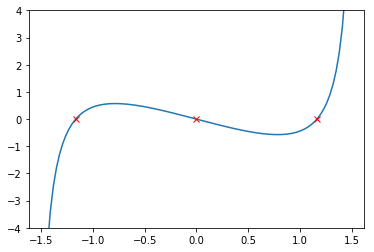

In [21]:
# Values for the x axis
x = np.linspace(-np.pi/2 + 0.1, np.pi/2 - 0.1, 100)
# Set the limits for the y axis
plt.ylim(-4, 4)

# Plot f
plt.plot(x, f(x))

# Plot the roots found by Newton's method
plt.plot(sol1, f(sol1), 'xr')
plt.plot(sol2, f(sol2), 'xr')
plt.plot(sol3, f(sol3), 'xr');

This is a function to calculate the numerical derivative of $f$:

In [5]:
def numerical_derivative(f, x, dx=1e-6):
    "Calculate the derivative of f using numerical approximation"
    return (f(x+dx) - f(x-dx)) / (2*dx)

# Test cases
print(df(1.2))
print(numerical_derivative(f, 1.2))

5.61596396721
5.61596396675


The default dx is chosen because it seems a good value, smaller and bigger scaling diverge from a good approximation for $f$:

In [6]:
print(df(1.2))
print(numerical_derivative(f, 1.2))
print(numerical_derivative(f, 1.2, 1e-5))
print(numerical_derivative(f, 1.2, 1e-4))
print(numerical_derivative(f, 1.2, 1e-7))
print(numerical_derivative(f, 1.2, 1e-8))

5.61596396721
5.61596396675
5.61596397255
5.61596449646
5.61596396942
5.61596391613


## Exercise 10.3 (optional, low pass image filter)

Images files can be loaded and displayed with Matplotlib. An imported image is stored as a 
three-dimensional NumPy array of floats. The shape of the array is `[0:nx, 0:ny, 0:3]`. 
where `nx` is the number of pixels in the $x$-direction, `ny` is the number of pixels in the $y$-direction,
and the third axis is for the colour component (RGB: red, green and blue) intensity. See http://matplotlib.org/users/image_tutorial.html for more background.

Below we fetch an image and display it:

<class 'numpy.ndarray'>
Image array shape: (375, 500, 3)


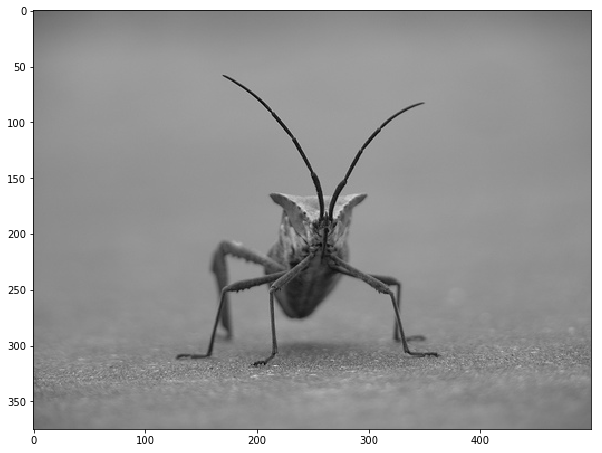

In [7]:
# Import image
img = mpimg.imread('https://raw.githubusercontent.com/matplotlib/matplotlib.github.com/master/_images/stinkbug.png')

# Check type and shape
print(type(img))
print("Image array shape: {}".format(img.shape))

# Display image
plt.figure(figsize=(10,10))
plt.imshow(img);

The task is to write a function that applies a particular low-pass filter algorithm to an image array and 
returns the 
filtered image. With this particular filter, the value of a pixel in the filtered image is equal to the average value
of the four neighbouring pixels in the original image. For the `[i, j, :]` pixel, the neighbours are 
`[i, j+1, :]`, `[i, j-1, :]`, `[i+1, j, :]` and  `[i-1, j, :]`. 

Run the filter algorithm multiple times on the above image to explore the effect of the filter.

*Hint*: To create a NumPy array of zeros, `B`,  with the same shape as array `A`, use:
```python
import numpy as np
B = np.zeros_like(A)
```

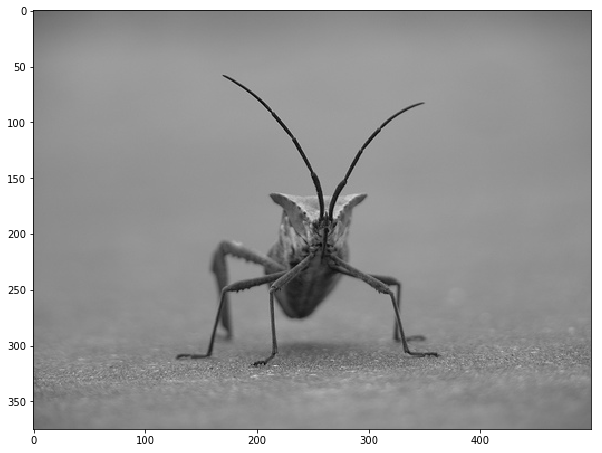

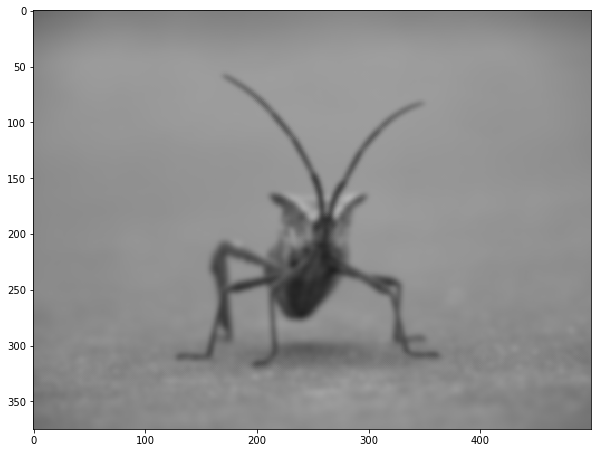

In [8]:
def low_pass_filter(img):
    "Apply a filter on an image taking the mean of the neighbouring pixels"
    # Initialize the return array
    B = np.zeros_like(img)
    
    # Iterate over all pixels in a row
    for i in range(0,np.shape(img)[0]):
        # Iterate over all pixels in a column
        for j in range(0,np.shape(img)[1]):

            if j == 0:
                # First column and first row -> no i-1, j-1 terms
                if i == 0:
                    B[i, j] = (img[i, j+1, :] + img[i+1, j, :]) / 2
                # First column and last row -> no i+1, j-1 terms
                elif i == np.shape(img)[0] - 1:
                    B[i, j] = (img[i, j+1, :] + img[i-1, j, :]) / 2
                # First column, other rows -> no j-1 term
                else:
                    B[i, j] = (img[i, j+1, :] + img[i+1, j, :] + img[i-1, j, :]) / 3

            elif i == 0:
                # First row and last column -> no i-1, j+1 terms
                if j == np.shape(img)[1] - 1:
                    B[i, j] = (img[i, j-1, :] + img[i+1, j, :]) / 2
                # First row, other columns -> no i-1 term
                else:
                    B[i, j] = (img[i, j+1, :] + img[i, j-1, :] + img[i+1, j, :]) / 3

            elif j == np.shape(img)[1] - 1:
                # Last column and last row -> no i+1, j+1 terms
                if i == np.shape(img)[0] - 1:
                    B[i, j] = (img[i, j-1, :] + img[i-1, j, :]) / 2
                # Last column, other rows -> no j+1 term
                else:
                    B[i, j] = (img[i, j-1, :] + img[i+1, j, :] + img[i-1, j, :]) / 3

            # Last row, other columns -> no i+1 term
            elif i == np.shape(img)[0] - 1:
                B[i, j] = (img[i, j+1, :] + img[i, j-1, :] + img[i-1, j, :]) / 3

            # All other cases
            else:
                B[i, j] = (img[i, j+1, :] + img[i, j-1, :] + img[i+1, j, :] + img[i-1, j, :]) / 4
    
    return B

# Test the filter applying it 10 times
filtered = img

for unused in range(10):
    filtered = low_pass_filter(filtered)

# Display the original image and the filtered one
plt.figure(figsize=(10,10))
plt.imshow(img);
plt.figure(figsize=(10,10))
plt.imshow(filtered);

This is a more clear (to me) version of the same program which is faster because it doesn't require all the iterations:

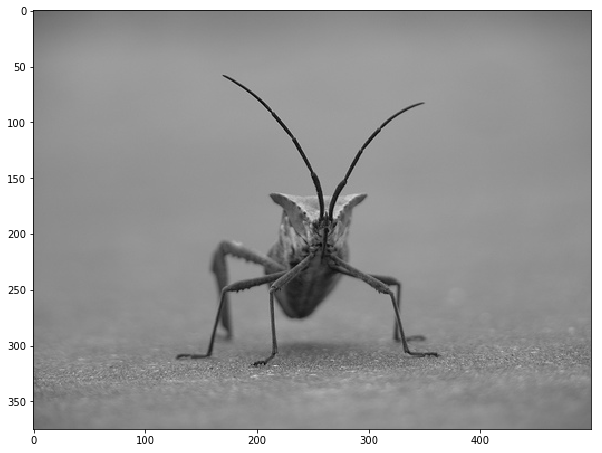

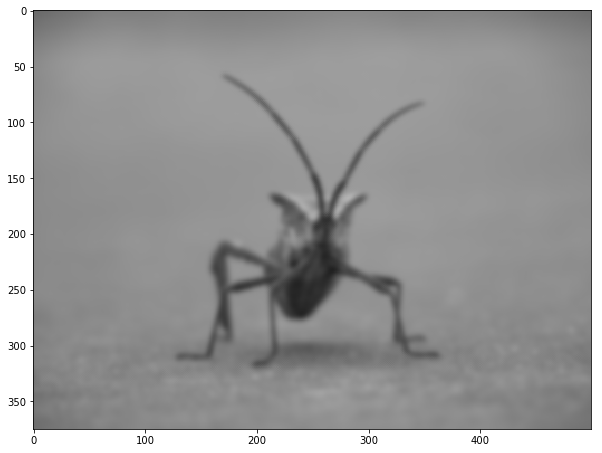

In [17]:
def low_pass_filter2(img):

    # Initialize the return array
    B = np.zeros_like(img)
    
    # All elements except first and last row and column
    B[1:-1, 1:-1, :] = (img[1:-1, 0:-2, :] # i, j-1
                        + img[0:-2, 1:-1, :] # i-1, j
                        + img[1:-1, 2:, :] # i, j+1
                        + img[2:, 1:-1, :]) / 4 # i+1, j
    
    # First row but not first or last column
    B[0, 1:-1, :] = (img[0, 0:-2, :] # i, j-1
                        + img[0, 2:, :] # i, j+1
                        + img[1, 1:-1, :]) / 3 # i+1, j
    
    # Last row but not first or last column
    B[-1, 1:-1, :] = (img[-1, 0:-2, :] # i, j-1
                        + img[-2, 1:-1, :] # i-1, j
                        + img[-1, 2:, :]) / 3 # i, j+1
    
    # First column but not first or last row
    B[1:-1, 0, :] = (img[0:-2, 0, :] # i-1, j
                        + img[1:-1, 1, :] # i, j+1
                        + img[2:, 0, :]) / 3 # i+1, j
    
    # Last column but not first or last row
    B[1:-1, -1, :] = (img[1:-1, -2, :] # i, j-1
                        + img[0:-2, -1, :] # i-1, j
                        + img[2:, -1, :]) / 3 # i+1, j
    
    # First row and first column
    B[0, 0, :] = (img[0, 1, :] # i, j+1
                        + img[1, 0, :]) / 2 # i+1, j
    
    # First row and last column
    B[0, -1, :] = (img[0, -2, :] # i, j-1
                        + img[1, -1, :]) / 2 # i+1, j
    
    # Last row and first column
    B[-1, 0, :] = (img[-2, 0, :] # i-1, j
                        + img[-1, 1, :]) / 2 # i, j+1
    
    # Last row and last column
    B[-1, -1, :] = (img[-1, -2, :] # i, j-1
                        + img[-2, -1, :]) / 2 # i-1, j
    
    return B

# Test the filter applying it 10 times
filtered2 = img

for unused in range(10):
    filtered2 = low_pass_filter2(filtered)

# Display the original image and the filtered one
plt.figure(figsize=(10,10))
plt.imshow(img);
plt.figure(figsize=(10,10))
plt.imshow(filtered2);